## Funciones de Distribución de probabilidades

Las veces que ocurre una **variable aleatoria** para un número en concreto se llama Función de Distribución de Probabilidad (PDF->Probability Density Function), es decir que tome un valor exacto.

Función de Distribución Acumulativa (CDF -> Cumulative Density Function) se trata la probabilidad que una variable aleatoria sea menor o igual a un valor concreto.

Las funciones mas conocidas son:
* **_La curva Normal (campana de Gauss)_** 
* **_La distribución uniforme_**
* De Poisson
* La binomial 
* La multinomial


## La distribución Uniforme
Es aquella en que se tienen 2 puntos y la probabilidad de que ocurra algo entre esos dos puntos siempre es la misma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99603.,  99750.,  99704.,  99869., 100440.,  99945., 100037.,
        100379.,  99879., 100394.]),
 array([ 1.0000697 , 10.90005083, 20.80003196, 30.70001309, 40.59999422,
        50.49997535, 60.39995648, 70.29993761, 80.19991874, 90.09989987,
        99.999881  ]),
 <BarContainer object of 10 artists>)

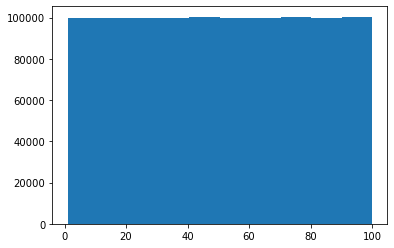

In [3]:
%matplotlib inline
plt.hist(data)

## La campana de Gauss
### Distribución Normal

In [4]:
data = np.random.randn(1000000) ##randn no crea numeros aleatorios en distribución normal standar con la media cero y la desviación tipica 1

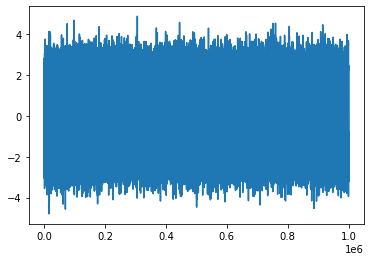

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([6.40000e+01, 2.10900e+03, 2.67850e+04, 1.48175e+05, 3.38660e+05,
        3.27342e+05, 1.32661e+05, 2.26240e+04, 1.53400e+03, 4.60000e+01]),
 array([-4.7966711 , -3.82896981, -2.86126853, -1.89356724, -0.92586595,
         0.04183534,  1.00953663,  1.97723791,  2.9449392 ,  3.91264049,
         4.88034178]),
 <BarContainer object of 10 artists>)

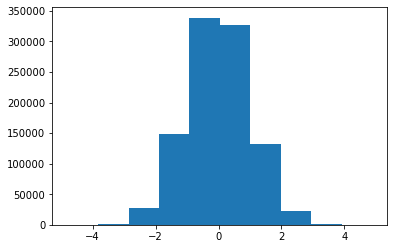

In [6]:
plt.hist(data)

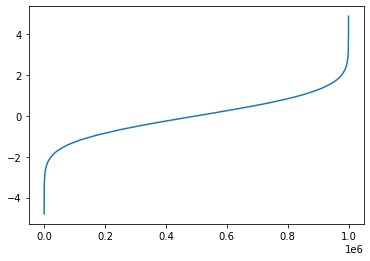

In [7]:
plt.plot(x,sorted(data)) ## forma de distribución acumulada d ela campna de gauss. Con sorted se ordenan los datos para este tipod e grafico

(array([1.300e+01, 1.260e+02, 7.030e+02, 2.013e+03, 3.198e+03, 2.618e+03,
        1.060e+03, 2.420e+02, 2.600e+01, 1.000e+00]),
 array([-4.30981493, -2.20501713, -0.10021933,  2.00457847,  4.10937627,
         6.21417407,  8.31897187, 10.42376968, 12.52856748, 14.63336528,
        16.73816308]),
 <BarContainer object of 10 artists>)

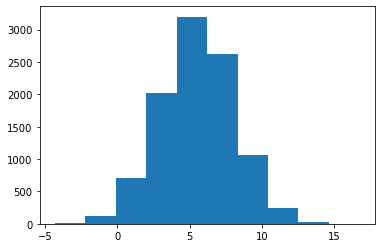

In [8]:
mu = 5.5 # mi propia media
sd = 2.5 # mi propia desviación estandar
data = mu + sd*np.random.randn(10000) # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)  ## Te genera dos muestras (arrays) de tamaño 4
data

array([[ 1.70757903e+00,  9.89963422e-02, -9.55320972e-01,
        -1.45691432e+00],
       [ 2.32047124e+00,  1.05288722e+00,  1.94718773e+00,
         7.18790718e-04]])

## La simulación de Monte Carlo

* Generamos dos número aleatorios uniformes x e y entre 0 y 1 en total 1000 veces
* Calcularemos x^2 + y^2
* Si el valor es inferior a 1 -> estamos dentro del círculo
* Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos poara obtener una aproximación d ela probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces ( por ejejmplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedioo de los 100 experimentos anteriores para dar un valor fina π.

In [10]:
def pi_montecarLo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14289


(3.14289, [<matplotlib.lines.Line2D at 0x7fb69df9bd90>])

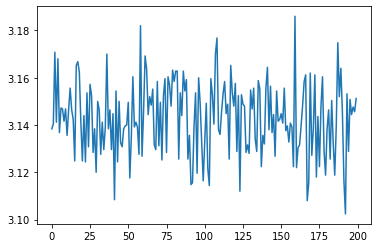

In [11]:
pi_montecarLo(10000, 200)

### Dummy Data Sets

In [14]:
n = 1000000
data = pd.DataFrame({
    'A' : np.random.randn(n),
    'B' : 1.5 + 2.5 * np.random.randn(n),
    'C' : np.random.uniform(5, 32, n)
})

In [17]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000995,1.502468,18.506835
std,1.000806,2.501510,7.785866
min,-4.815498,-12.059351,5.000001
25%,-0.675716,-0.187005,11.768092
50%,0.000527,1.504914,18.495819
75%,0.676018,3.189668,25.240050
max,5.168716,14.181900,31.999995


(array([7.10000e+01, 2.39800e+03, 3.18010e+04, 1.71237e+05, 3.64438e+05,
        3.09580e+05, 1.05412e+05, 1.43200e+04, 7.31000e+02, 1.20000e+01]),
 array([-4.81549847, -3.81707705, -2.81865563, -1.82023421, -0.82181279,
         0.17660863,  1.17503005,  2.17345147,  3.17187289,  4.1702943 ,
         5.16871572]),
 <BarContainer object of 10 artists>)

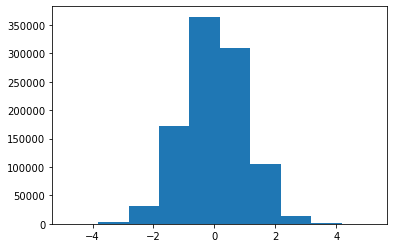

In [18]:
plt.hist(data['A'])

(array([9.00000e+00, 4.47000e+02, 1.10710e+04, 9.86140e+04, 3.19838e+05,
        3.78846e+05, 1.63826e+05, 2.58300e+04, 1.49200e+03, 2.70000e+01]),
 array([-12.05935063,  -9.43522553,  -6.81110042,  -4.18697532,
         -1.56285021,   1.0612749 ,   3.6854    ,   6.30952511,
          8.93365021,  11.55777532,  14.18190043]),
 <BarContainer object of 10 artists>)

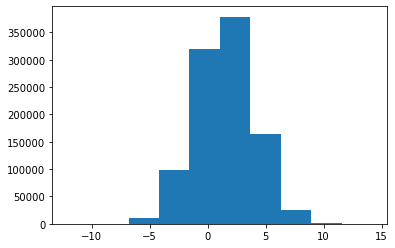

In [19]:
plt.hist(data['B'])

(array([ 98945., 100353., 100098., 100106., 100639.,  99441., 100990.,
         99506.,  99782., 100140.]),
 array([ 5.00000128,  7.70000067, 10.40000005, 13.09999944, 15.79999882,
        18.49999821, 21.19999759, 23.89999698, 26.59999637, 29.29999575,
        31.99999514]),
 <BarContainer object of 10 artists>)

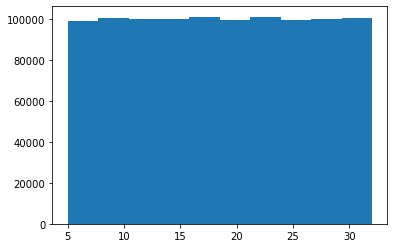

In [20]:
plt.hist(data['C'])

In [21]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')

In [22]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [25]:
colum_names = data.columns.values.tolist()

In [27]:
a = len(colum_names)
a

21

In [30]:
new_data = pd.DataFrame(
{
    'Column Name' : colum_names,
    'A' : np.random.randn(a),
    'B' : np.random.uniform(0,1,a)
})

In [31]:
new_data

,Column Name,A,B
0,State,-0.187824,0.089208
1,Account Length,-0.546837,0.458836
2,Area Code,-0.444486,0.188647
3,Phone,0.761678,0.853633
4,Int'l Plan,0.872956,0.856636
5,VMail Plan,1.321367,0.020457
6,VMail Message,-0.034314,0.983609
7,Day Mins,1.803015,0.748911
8,Day Calls,0.775927,0.743772
9,Day Charge,-0.572159,0.929663
